In [0]:
# Importamos librerías clave:
import numpy as np # algebra lineal
import pandas as pd # trabajar con tablas
import matplotlib.pyplot as plt # graficas

# import keras as K # redes neuronales
import tensorflow.keras as K # EL NUEVO KERAS!!!!!!!! (el anterior tiene problemas)

from sklearn.model_selection import train_test_split

# Librerías con métricas:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [61]:
df = pd.read_csv('/content/drive/My Drive/Diners/BASE_PROSPECCION2.csv')
df.head()

,PERIODO,TIPDOC,NUMDOC,EDAD,IPNETO,LINEA_USD,NUM_TELEF,FLG_DEPENDIENTE,PRODUCTO,NIVELRIESGO,CANAL_ASIGNADO,DEPARTAMENTO,ZONA,PROSPECTO_PREMIUM,FLG_FORMALIZO,RECURRENCIA,NUM_TC,NUM_TC_ACTIVAS,NUM_TC_BENCH,NUM_TC_BENCH_ACT,NUM_TC_RETAIL,NUM_TC_RETAIL_ACT,NUM_TC_OTROS,NUM_TC_OTROS_ACT,SUM_LINEAS_RCC,SUM_LINEAS_BENCH,SUM_LINEAS_RETAIL,SUM_LINEAS_OTROS,SUM_SALDO_RCC,SUM_SALDO_BENCH,SUM_SALDO_RETAIL,SUM_SALDO_OTROS,MAX_LINEA_RCC,AVG_LINEA_RCC,MAX_SALDO_RCC,AVG_SALDO_RCC,MAX_ENTIDAD_RCC,USO_LINEA_RCC,USO_MAXLINEA_RCC,MAX_LINEA_BENCH,AVG_LINEA_BENCH,MAX_SALDO_BENCH,AVG_SALDO_BENCH,MAX_ENTIDAD_BENCH,USO_LINEA_BENCH,USO_MAXLINEA_BENCH,MAX_LINEA_RETAIL,AVG_LINEA_RETAIL,MAX_SALDO_RETAIL,AVG_SALDO_RETAIL,MAX_ENTIDAD_RETAIL,USO_LINEA_RETAIL,USO_MAXLINEA_RETAIL,MAX_LINEA_OTROS,AVG_LINEA_OTROS,MAX_SALDO_OTROS,AVG_SALDO_OTROS,MAX_ENTIDAD_OTROS,USO_LINEA_OTROS,USO_MAXLINEA_OTROS,SALDO_PLD,SALDO_VEHICULAR,SALDO_HIPOTECARIO,SALDO_TOTAL,CUOTA_CONSUMO,FACTOR_ENDEU_CONSUMO,CUOTA_TOTAL,FACTOR_ENDEU_TOTAL
0,201908,1,8127823,49,1582.1792,2500,1,1,1,2,1,1,1,0,0,2,2,1,1,0,1,1,0,0,11300.0,7400.0,3900.0,0.0,790.87,0.00,790.87,0.0,7400.0,807.14,0.00,56.49,2,0.07,0.00,7400.0,1850.0,0.00,0.00,2,0.00,0.00,3900.0,975.0,790.87,197.72,10,0.20,0.20,0.0,0.0,0.0,0.0,6,0.0,0.0,0.0,0.0,0.0,790.87,35.59,0.02,35.59,0.02
1,201908,1,8128955,49,2517.2550,6400,1,1,2,2,4,1,1,0,0,2,1,1,1,1,0,0,0,0,21000.0,21000.0,0.0,0.0,7454.75,7454.75,0.00,0.0,21000.0,1500.00,7454.75,532.48,1,0.35,0.35,21000.0,5250.0,7454.75,1863.69,1,0.35,0.35,0.0,0.0,0.00,0.00,10,0.00,0.00,0.0,0.0,0.0,0.0,6,0.0,0.0,0.0,0.0,0.0,7454.75,335.46,0.13,335.46,0.13
2,201908,1,8126161,50,2315.3083,3800,3,1,1,1,1,1,1,0,0,2,1,1,0,0,1,1,0,0,16100.0,0.0,16100.0,0.0,1368.95,0.00,1368.95,0.0,16100.0,1150.00,1368.95,97.78,10,0.09,0.09,0.0,0.0,0.00,0.00,0,0.00,0.00,16100.0,4025.0,1368.95,342.24,10,0.09,0.09,0.0,0.0,0.0,0.0,6,0.0,0.0,0.0,0.0,0.0,1368.95,61.60,0.03,61.60,0.03
3,201908,1,8127063,49,1874.7360,2600,1,1,1,2,-1,1,1,0,0,2,2,1,1,1,1,0,0,0,10400.0,7800.0,2600.0,0.0,111.33,111.33,0.00,0.0,7800.0,742.86,111.33,7.95,3,0.01,0.01,7800.0,1950.0,111.33,27.83,3,0.01,0.01,2600.0,650.0,0.00,0.00,14,0.00,0.00,0.0,0.0,0.0,0.0,6,0.0,0.0,0.0,0.0,0.0,111.33,5.01,0.00,5.01,0.00
4,201908,1,8127292,50,1846.7600,1700,1,1,1,2,-1,1,1,0,0,1,2,1,1,1,1,0,0,0,16600.0,16500.0,100.0,0.0,5771.64,5771.64,0.00,0.0,16500.0,1185.71,5771.64,412.26,3,0.35,0.35,16500.0,4125.0,5771.64,1442.91,3,0.35,0.35,100.0,25.0,0.00,0.00,7,0.00,0.00,0.0,0.0,0.0,0.0,6,0.0,0.0,0.0,0.0,0.0,5771.64,259.72,0.14,259.72,0.14


In [62]:
df.describe()

,PERIODO,TIPDOC,NUMDOC,EDAD,IPNETO,LINEA_USD,NUM_TELEF,FLG_DEPENDIENTE,PRODUCTO,NIVELRIESGO,CANAL_ASIGNADO,DEPARTAMENTO,ZONA,PROSPECTO_PREMIUM,FLG_FORMALIZO,RECURRENCIA,NUM_TC,NUM_TC_ACTIVAS,NUM_TC_BENCH,NUM_TC_BENCH_ACT,NUM_TC_RETAIL,NUM_TC_RETAIL_ACT,NUM_TC_OTROS,NUM_TC_OTROS_ACT,SUM_LINEAS_RCC,SUM_LINEAS_BENCH,SUM_LINEAS_RETAIL,SUM_LINEAS_OTROS,SUM_SALDO_RCC,SUM_SALDO_BENCH,SUM_SALDO_RETAIL,SUM_SALDO_OTROS,MAX_LINEA_RCC,AVG_LINEA_RCC,MAX_SALDO_RCC,AVG_SALDO_RCC,MAX_ENTIDAD_RCC,USO_LINEA_RCC,USO_MAXLINEA_RCC,MAX_LINEA_BENCH,AVG_LINEA_BENCH,MAX_SALDO_BENCH,AVG_SALDO_BENCH,MAX_ENTIDAD_BENCH,USO_LINEA_BENCH,USO_MAXLINEA_BENCH,MAX_LINEA_RETAIL,AVG_LINEA_RETAIL,MAX_SALDO_RETAIL,AVG_SALDO_RETAIL,MAX_ENTIDAD_RETAIL,USO_LINEA_RETAIL,USO_MAXLINEA_RETAIL,MAX_LINEA_OTROS,AVG_LINEA_OTROS,MAX_SALDO_OTROS,AVG_SALDO_OTROS,MAX_ENTIDAD_OTROS,USO_LINEA_OTROS,USO_MAXLINEA_OTROS,SALDO_PLD,SALDO_VEHICULAR,SALDO_HIPOTECARIO,SALDO_TOTAL,CUOTA_CONSUMO,FACTOR_ENDEU_CONSUMO,CUOTA_TOTAL,FACTOR_ENDEU_TOTAL
count,179591.0,179591.0,1.795910e+05,179591.000000,179591.000000,179591.000000,179591.000000,179591.000000,179591.000000,179591.000000,179591.000000,179591.000000,179591.000000,179591.000000,179591.000000,179591.000000,179591.000000,179591.000000,179591.000000,179591.000000,179591.000000,179591.000000,179591.000000,179591.000000,179591.000000,179591.000000,179591.00000,179591.000000,179591.000000,179591.000000,179591.000000,179591.000000,179591.000000,179591.000000,179591.000000,179591.000000,179591.000000,179591.000000,179591.000000,179591.000000,179591.000000,179591.000000,179591.000000,179591.000000,179591.000000,179591.000000,179591.000000,179591.000000,179591.000000,179591.000000,179591.000000,179591.000000,179591.000000,179591.000000,179591.000000,179591.000000,179591.000000,179591.000000,179591.000000,179591.000000,1.795910e+05,179591.000000,1.795910e+05,1.795910e+05,179591.000000,179591.000000,179591.000000,179591.000000
mean,201908.0,1.0,2.575137e+07,43.916187,3070.285987,5404.570385,1.059324,1.472229,1.304620,2.376700,0.364228,0.924122,3.078144,0.010819,0.024099,1.718761,2.256566,1.251393,0.945877,0.664064,1.108753,0.533913,0.201937,0.053416,29981.002287,21173.417797,7038.48537,1769.099120,3797.547003,3012.856091,662.295511,122.395401,19445.949710,2141.500237,2631.462641,271.253376,5.161266,0.120173,0.123933,17044.393272,5293.354527,2438.625226,753.214078,1.411819,0.106437,0.107001,5087.652572,1759.621524,598.296837,165.573911,10.929785,0.067559,0.078038,1731.876395,294.849791,121.525699,20.399238,6.546820,0.011565,0.011729,2.277724e+03,741.683158,1.887258e+04,2.392242e+04,456.862219,0.110388,456.862219,0.110388
std,0.0,0.0,1.867600e+07,12.908465,2492.943494,4437.655695,1.039736,0.499230,0.460248,0.921078,1.805975,0.264803,1.974487,0.103451,0.153358,0.449605,1.294923,0.986444,0.763861,0.686768,1.000531,0.728250,0.416972,0.228497,39936.639053,35390.071809,10488.35592,6544.794428,8330.599145,7816.642457,2052.915898,1103.549778,24086.040986,2852.617065,6466.555903,595.042784,4.439247,0.157247,0.188762,24874.599866,8847.517990,6411.968248,1954.160621,1.383607,0.179703,0.189150,6843.878706,2622.089046,1905.125366,513.228978,1.947136,0.151646,0.168664,6359.603022,1090.799056,1092.553275,183.924969,1.191339,0.072194,0.073064,9.058264e+03,5712.485891,8.755730e+04,8.527640e+04,1078.356185,0.171280,1078.356185,0.171280
min,201908.0,1.0,1.757000e+03,0.000000,1000.996600,1300.000000,0.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,20190

In [0]:
# Separamos X e Y's:
list_predictors = ['EDAD','IPNETO','LINEA_USD','NUM_TELEF','FLG_DEPENDIENTE','PRODUCTO','NIVELRIESGO'
                   ,'CANAL_ASIGNADO','DEPARTAMENTO','ZONA','PROSPECTO_PREMIUM','RECURRENCIA','NUM_TC','NUM_TC_ACTIVAS'
                  ,'NUM_TC_BENCH','NUM_TC_BENCH_ACT','NUM_TC_RETAIL','NUM_TC_RETAIL_ACT','NUM_TC_OTROS','NUM_TC_OTROS_ACT'
                  ,'SUM_LINEAS_RCC','SUM_LINEAS_BENCH','SUM_LINEAS_RETAIL','SUM_LINEAS_OTROS','SUM_SALDO_RCC'
                  ,'SUM_SALDO_BENCH','SUM_SALDO_RETAIL','SUM_SALDO_OTROS','MAX_LINEA_RCC','AVG_LINEA_RCC','MAX_SALDO_RCC'
                  ,'AVG_SALDO_RCC','MAX_ENTIDAD_RCC','USO_LINEA_RCC','USO_MAXLINEA_RCC','MAX_LINEA_BENCH','AVG_LINEA_BENCH'
                  ,'MAX_SALDO_BENCH','AVG_SALDO_BENCH','MAX_ENTIDAD_BENCH','USO_LINEA_BENCH','USO_MAXLINEA_BENCH','MAX_LINEA_RETAIL'
                  ,'AVG_LINEA_RETAIL','MAX_SALDO_RETAIL','AVG_SALDO_RETAIL','MAX_ENTIDAD_RETAIL','USO_LINEA_RETAIL','USO_MAXLINEA_RETAIL'
                  ,'MAX_LINEA_OTROS','AVG_LINEA_OTROS','MAX_SALDO_OTROS','AVG_SALDO_OTROS','MAX_ENTIDAD_OTROS','USO_LINEA_OTROS'
                  ,'USO_MAXLINEA_OTROS','SALDO_PLD','SALDO_VEHICULAR','SALDO_HIPOTECARIO','SALDO_TOTAL','CUOTA_CONSUMO'
                  ,'FACTOR_ENDEU_CONSUMO','CUOTA_TOTAL','FACTOR_ENDEU_TOTAL',]
list_target = ['FLG_FORMALIZO']

# División train-test!
X_train, X_test, Y_train, Y_test= train_test_split(
    df[list_predictors], # aquí se introduce el conjunto de variables predictoras
    df[list_target], # aquí se introduce el objetivo a predecir
    test_size = 0.2, # indicamos que queremos entrenar sobre el 80% de datos y evaluar sobre el 20% restante
    random_state = 1234
)

In [6]:
# Verificamos que las divisiones se hicieron correctamente, observando las dimensiones:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(143672, 64)
(35919, 64)
(143672, 1)
(35919, 1)


In [64]:
# Extraemos el numero de columnas de X:
num_cols = X_train.shape[1]
num_cols

64

In [65]:
# Puntos a configurar
# 1) Arquitectura
# 2) Función de Activación

# Acá agregamos las capas!
# En problemas más complejos conviene aplicar 'relu' en vez de sigmoid.

# Dropout 'apaga' una proporción de las neuronas de la capa previa en cada iteración. Esto ocasiona
# que se entrenen varias 'sub-redes' que comparten información similar, pero se corrigen entre sí al
# ensamblarse. El efecto final es que la curva del error de entrenamiento y validación estén cercanos, lo cual
# permite agregar más capas sin tener tanto temor al sobreajuste. Sin embargo, llegar al balance óptimo de
# la arquitectura requiere más  intento que una red sin Dropout.
# PAPER: http://jmlr.org/papers/volume15/srivastava14a.old/srivastava14a.pdf

# 'he_normal' es una forma de inicializar los pesos de las conexiones de tal manera que facilite su convergencia
# y hace sinergia con RELU. Es un estándar utilizarla si vamos a introducir RELU.

model = K.Sequential([
    K.layers.Dense(18, activation='relu',kernel_initializer='he_normal', input_shape=(num_cols,)),
    K.layers.Dropout(0.1),
    K.layers.Dense(12, activation='relu',kernel_initializer='he_normal'),
    K.layers.Dropout(0.1),
    K.layers.Dense(6, activation='relu',kernel_initializer='he_normal'),
    K.layers.Dropout(0.1),
    K.layers.Dense(1, activation='linear',kernel_initializer='he_normal')
])

# la sigmoid son valores entre 0<sigmoid<1
# pongo la última lineal porque quiero que me de el valor de un terreno que no esta entre 0 y 1

model.summary() # resumen de la arquitectura

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 18)                1170      
_________________________________________________________________
dropout_3 (Dropout)          (None, 18)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 12)                228       
_________________________________________________________________
dropout_4 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 6)                 78        
_________________________________________________________________
dropout_5 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                

In [0]:
# Definimos el optimizador y la función de perdida de la RED:
model.compile(optimizer=K.optimizers.Adam(learning_rate=0.01), loss='MSE', 
              metrics = ['MAE', 'MAPE']) # estas son metricas extras OPCIONALES

In [67]:
lista_batch = [200,400,600,800,1000,1200]
lista_epochs = [300]
validation = []

for i in lista_batch:
  #for j in lista_epochs:
  log = model.fit(
    x = X_train, y = Y_train, batch_size = batch_size
    , validation_data=[X_test,Y_test]
    , epochs = epochs,
    validation_split=0.15 # 20% para validacion
  )
  y_predicted = model.predict(X_test)
  validation.append([i,300,r2_score(Y_test,y_predicted)])

data_final = pd.DataFrame(validation, columns = ['Batchs' , 'Epocas','r2_score'])
data_final

Train on 143672 samples, validate on 35919 samples
Epoch 1/300
143672/143672 [==============================] - 1s 4us/sample - loss: 21434653.7434 - mean_absolute_error: 1444.1921 - mean_absolute_percentage_error: 1413153161216.0000 - val_loss: 2041276.2859 - val_mean_absolute_error: 388.9141 - val_mean_absolute_percentage_error: 381445505024.0000
Epoch 2/300
143672/143672 [==============================] - 0s 3us/sample - loss: 1936938.7619 - mean_absolute_error: 341.7906 - mean_absolute_percentage_error: 334849048576.0000 - val_loss: 70434.0398 - val_mean_absolute_error: 53.1016 - val_mean_absolute_percentage_error: 52224442368.0000
Epoch 3/300
143672/143672 [==============================] - 0s 3us/sample - loss: 172778.8104 - mean_absolute_error: 73.7945 - mean_absolute_percentage_error: 72494415872.0000 - val_loss: 3517.0572 - val_mean_absolute_error: 7.5509 - val_mean_absolute_percentage_error: 7322828800.0000
Epoch 4/300
143672/143672 [==============================] - 0s 3us/s

,Batchs,Epocas,r2_score
0,200,300,-1.895232e-01
1,400,300,-2.185887e-02
2,600,300,-2.862071e-05
3,800,300,-6.441356e-06
4,1000,300,-5.271479e-09
5,1200,300,-1.961147e-06


In [55]:
# 5) el batch es el tamaño en el que voy a dividir mi data
# Es buena práctica definir hiperparametros arriba!
batch_size = 32000 # recordar que tenemos 500 registros, nada más
epochs = 300

# 6) Epocas: número de idas y vueltas

# 7) % de validación

# Entrenamos!
log = model.fit(
    x = X_train, y = Y_train, batch_size = batch_size
    , validation_data=[X_test,Y_test]
    , epochs = epochs,
    validation_split=0.15 # 20% para validacion
)

Train on 143672 samples, validate on 35919 samples
Epoch 1/300
143672/143672 [==============================] - 0s 3us/sample - loss: 0.0237 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 23151548.0000 - val_loss: 0.0229 - val_mean_absolute_error: 0.0468 - val_mean_absolute_percentage_error: 23951350.0000
Epoch 2/300
143672/143672 [==============================] - 0s 3us/sample - loss: 0.0237 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 24525166.0000 - val_loss: 0.0229 - val_mean_absolute_error: 0.0466 - val_mean_absolute_percentage_error: 23698054.0000
Epoch 3/300
143672/143672 [==============================] - 0s 3us/sample - loss: 0.0237 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 23374446.0000 - val_loss: 0.0229 - val_mean_absolute_error: 0.0475 - val_mean_absolute_percentage_error: 24599934.0000
Epoch 4/300
143672/143672 [==============================] - 0s 3us/sample - loss: 0.0237 - mean_absolute_error: 0.0478 - mean_abs

Text(0.5, 0, 'Epochs')

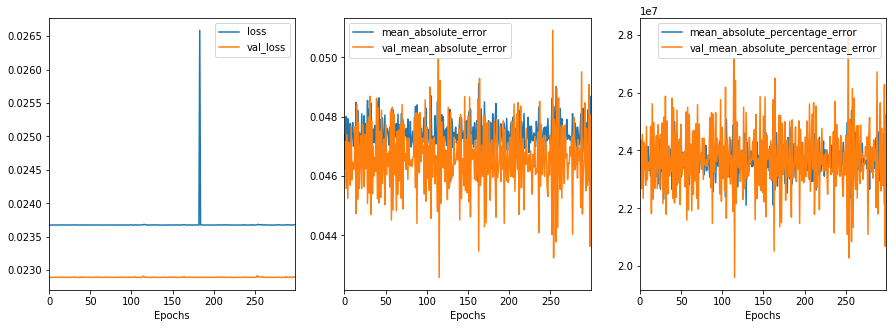

In [53]:
# Siempre es útil visualizar el historial de entrenamiento para asegurarnos que el modelo no sobreajuste!
historial = pd.DataFrame(log.history)

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,5))
historial[['loss', 'val_loss']].plot(ax=ax1)
historial[['mean_absolute_error', 'val_mean_absolute_error']].plot(ax=ax2)
historial[['mean_absolute_percentage_error', 'val_mean_absolute_percentage_error']].plot(ax=ax3)

ax1.set_xlabel('Epochs')
ax2.set_xlabel('Epochs')
ax3.set_xlabel('Epochs')

# si en el último grafico la linea naranja esta por encima de la azul significa que no ha aprendido
# al igual que en las primeras graficas las lineas deben estar más juntas para que este bien

In [54]:
# Utilizamos el modelo ya entrenado:
y_predicted = model.predict(X_test) # predicción sobre los datos que el modelo ya vió
print(
    "Métricas para el conjunto de prueba: \n R2: {} \n MAE: {} \n MSE: {}"\
    .format(
        r2_score(Y_test,y_predicted),
        mean_absolute_error(Y_test,y_predicted),
        mean_squared_error(Y_test,y_predicted)
    )
)

Métricas para el conjunto de prueba: 
 R2: -0.00025054211365338475 
 MAE: 0.04806684317032677 
 MSE: 0.02289785786571308


In [36]:
# Los resultados de las métricas sobre este conjunto de prueba son los que determinan si es recomendable
# aceptar o no el modelo
print(
    "Métricas para el conjunto de prueba: \n R2: {} \n MAE: {} \n MSE: {}"\
    .format(
        r2_score(
            y_true = Y_test, # los datos REALES
            y_pred = y_predicted # los datos estimados por el modelo
        ),
        mean_absolute_error(
            y_true = Y_test,
            y_pred = y_predicted
        ),
        mean_squared_error(
            y_true = Y_test,
            y_pred = y_predicted
        )
    )
)

Métricas para el conjunto de prueba: 
 R2: -3.083332665276828e-05 
 MAE: 0.04658499921885774 
 MSE: 0.022892828265263218
